In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from skimage.util import random_noise

In [2]:
img_input = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img/L067_0_input.npy')
img_target = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/RED_CNN/npy_img/L067_0_target.npy')

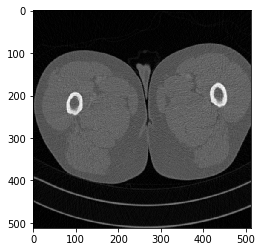

In [4]:
plt.imshow(img_input, cmap='gray')

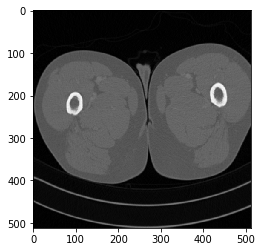

In [5]:
plt.imshow(img_target, cmap='gray')

In [6]:
from skimage.util import random_noise

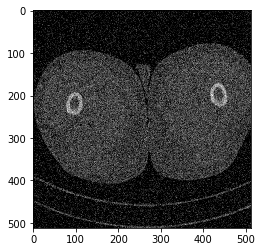

In [7]:
nois_img = random_noise(img_target, mode='gaussian')
plt.imshow(nois_img, cmap='gray')

In [20]:
nois_img = random_noise(img_target, mode='speckle')
nois_img.shape
# plt.imshow(nois_img, cmap='gray')

(512, 512)

In [14]:
img_input_ID = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset/0_input.npy')
img_target_ID = np.load('/home/jawor96/Documents/StudyICM/PracaMagisterska/ImageDenoiser/TrainingDataset/0_target.npy')

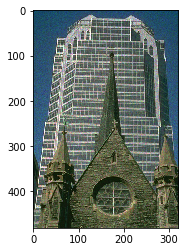

In [19]:
nois_img = random_noise(img_target_ID, mode='speckle')
plt.imshow(nois_img, cmap='gray')

In [ ]:
def gaussian_noise_simulator(CT_data_path, save_data_path):
    patient_list = sorted([d for d in os.listdir(CT_data_path)])
    for p_id, patient enumerate(patient_list):
        CT_imgs_orgin = [np.load(f) for f in sorted(glob(os.path.join(CT_data_path, patient, '*_target.npy')))]
        for i in range(len(CT_imgs_orgin)):
            noise_img = random_noise(CT_imgs_orgin[i], mode='speckle')
            f_in_name = '{}_{}_{}.npy'.format(patient, i, 'input')
            f_target_name = '{}_{}_{}.npy'.format(patient, i, 'target')
            np.save(os.path.join(save_data_path, f_in_name), noise_img)
            np.save(os.path.join(save_data_path, f_target_name), CT_imgs_orgin[i])

if __name__ == "__main__":
    CT_data_path = '/workspace/groups/vislab/Low_Dose_CT_Grand_Challenge/DL_Experiments/npy_img_CTnoise'
    save_data_path = '/workspace/groups/vislab/Low_Dose_CT_Grand_Challenge/DL_Experiments/npy_img'
    gaussian_noise_simulator(CT_data_path, save_data_path)